In [ ]:
import win32com.client
import pandas as pd

# Initialize Outlook application
outlook = win32com.client.Dispatch("Outlook.Application")
namespace = outlook.GetNamespace("MAPI")

# Get the calendar folder
calendar_folder = namespace.GetDefaultFolder(9)  # 9 refers to the calendar folder

# Get all appointments
appointments = calendar_folder.Items
appointments.IncludeRecurrences = True


# Create a list to store meeting details
meetings = []

# Iterate through the appointments and extract details
for appointment in appointments:
    meeting = {
        "Subject": appointment.Subject,
        "Start": appointment.Start,
        "End": appointment.End,
        "Location": appointment.Location,
        "Organizer": appointment.Organizer,
        "Required Attendees": appointment.RequiredAttendees,
        "Optional Attendees": appointment.OptionalAttendees,
        "Body": appointment.Body,
        "Type": appointment.Class
    }
    meetings.append(meeting)



In [ ]:
# Create a DataFrame from the list of meetings
df_meetings = pd.DataFrame(meetings)

In [4]:
# Update the Start and End fields with the .date() function
meetings = [{**meeting, 'Start': meeting['Start'].date(), 'End': meeting['End'].date()} for meeting in meetings]

In [5]:
df_meetings = pd.DataFrame(meetings)

In [6]:
df_meetings['Start'] = pd.to_datetime(df_meetings['Start'])

In [49]:
df_meetings.sample(10)

,Subject,Start,End,Location,Organizer,Required Attendees,Optional Attendees,Body,Type
2752,Kayla OOO,2024-03-29,2024-04-06,,Kayla Ma,Kayla Ma; Lucas Abreu; David Leite; Rafaella A...,,\r\n,26
3055,(Consultoria DHauz) Agenda Transformacional Fi...,2024-08-02,2024-08-02,Microsoft Teams Meeting,Giovanna Sampaio,Giovanna Sampaio; Lucas Abreu; Gabriela Mourao...,Caio Bombicini Pintor; Thiago Malatesta Teixeira,\r\n\r\n \r\n\r\n-----Original Appointment---...,26
1355,Bate papo+Analise PURAN,2021-04-05,2021-04-05,,Lucas Abreu,Rodrigo Almeida,,\r\n\r\n\r\n__________________________________...,26
2877,projeto alvaro,2024-05-03,2024-05-03,,Lucas Abreu,Lucas Abreu,,,26
2238,XPlayAcademy,2023-08-23,2023-08-23,Microsoft Teams Meeting,Ruy Castelli,Ruy Castelli; Fabio Ferraretto; Oscar Porto; M...,,"Amigos, vamos fechar o assunto da XPlayAcademy...",26
2590,Reuniao Dhauz e HC - Insights,2024-01-31,2024-01-31,Microsoft Teams Meeting,Fabio Ferraretto,Fabio Ferraretto; Lucas Abreu; Daniel Barberat...,,\r\n\r\n_____________________________________...,26
3250,Overview publicação Dashboards CEC Virtual,2024-10-21,2024-10-21,Reunião do Microsoft Teams,Priscila Cardoso Ferreira,Priscila Cardoso Ferreira; Lucas Abreu; João M...,,\r\n\r\n_____________________________________...,26
2773,Cronograma Churn,2024-04-03,2024-04-03,Reunião do Microsoft Teams,Julia Ortolan,Julia Ortolan; Noelson Abreu Benicio De Olivei...,Lucas Abreu; Eduardo Oest,\r\n\r\n_____________________________________...,26
3363,Daily Projeto Virtualização CEC,2025-01-06,2025-01-06,Reunião do Microsoft Teams,Fabio Gabri De Paiva,Fabio Gabri De Paiva; Priscila Cardoso Ferreir...,,\r\n\r\n_____________________________________...,26
1531,passagem decolar,2022-11-01,2022-11-01,,Lucas Abreu,Lucas Abreu,,https://www.decolar.com/checkout/purchase/4581...,26


In [ ]:
df_meetings.to_excel('meetings.xlsx', index=False)

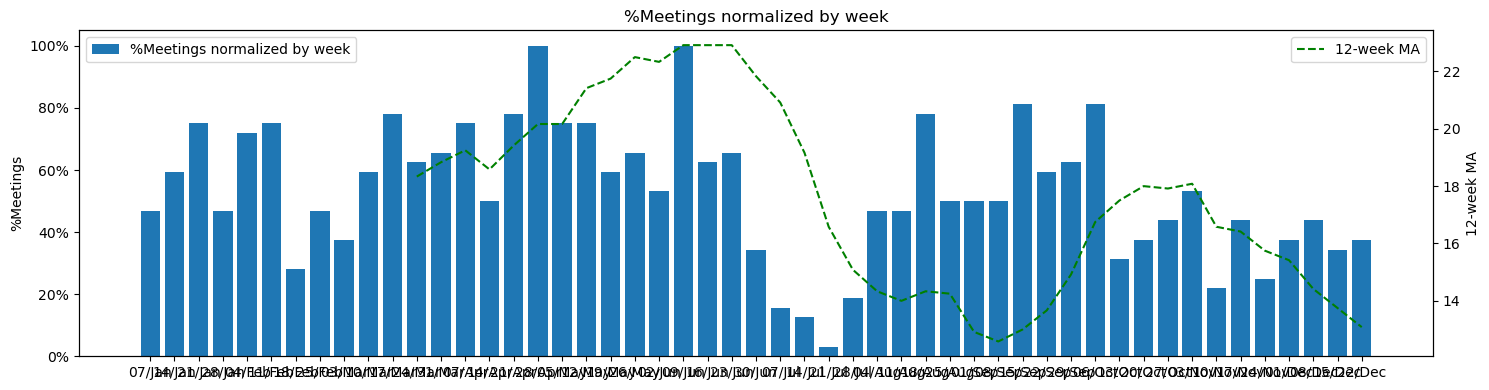

In [48]:
import matplotlib.pyplot as plt

ts = df_meetings[(df_meetings.Start >= '2024-01-01') & (df_meetings.Start < '2024-12-20')].set_index('Start').resample('W').size()
ts_ma = ts.rolling(window=12).mean()
ts = ts/ts.max() * 100

# Ensure the index is in datetime format
ts.index = pd.to_datetime(ts.index)
ts_ma.index = pd.to_datetime(ts_ma.index)

ts.index = ts.index.strftime('%d/%b')
fig, ax1 = plt.subplots(figsize=(15, 4))

ax1.bar(ts.index, ts, label='%Meetings normalized by week')
ax1.set_ylabel('%Meetings')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(ts_ma.index.strftime('%d/%b'), ts_ma, color='green', linestyle='--', label='12-week MA')
ax2.set_ylabel('12-week MA')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.title('%Meetings normalized by week')
plt.tight_layout()
plt.show()